# **Medical Cost Analysis**

This notebook's aim estimate the approximate cost of a person's health insurance based on the given variables.

Following are the columns present ans their description:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [ ]:

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [38]:
# Load the dataset
url = '/content/drive/MyDrive/Colab Notebooks/insurance.csv'
data = pd.read_csv(url)

In [39]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that, there are 1338 rows.

minimum age: 18, maximum age: 64


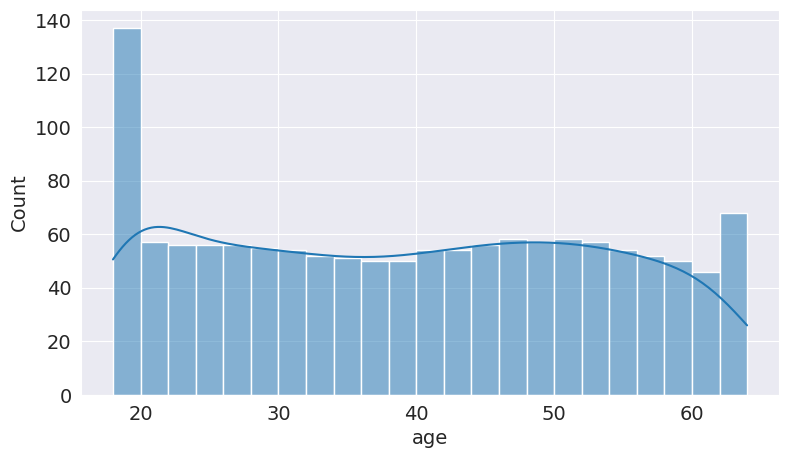

In [ ]:
print(f"minimum age: {data['age'].min()}, maximum age: {data['age'].max()}")
sns.histplot(data, x = "age", bins = 23, kde = True)
plt.show()

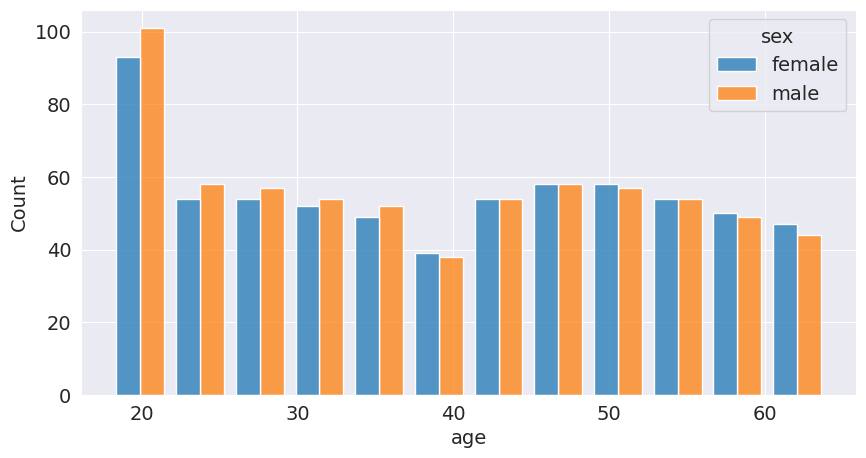

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(data, x = "age", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()

From the above figure, we can see that, in each bin, male and female are almost equal.

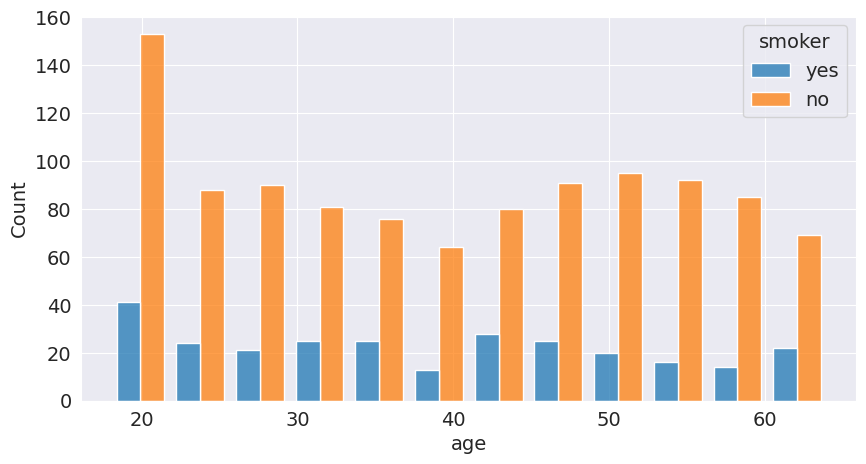

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(data, x = "age", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()

we can see that, in each bin, the population of smokers is around 1/3rd of non-smokers.

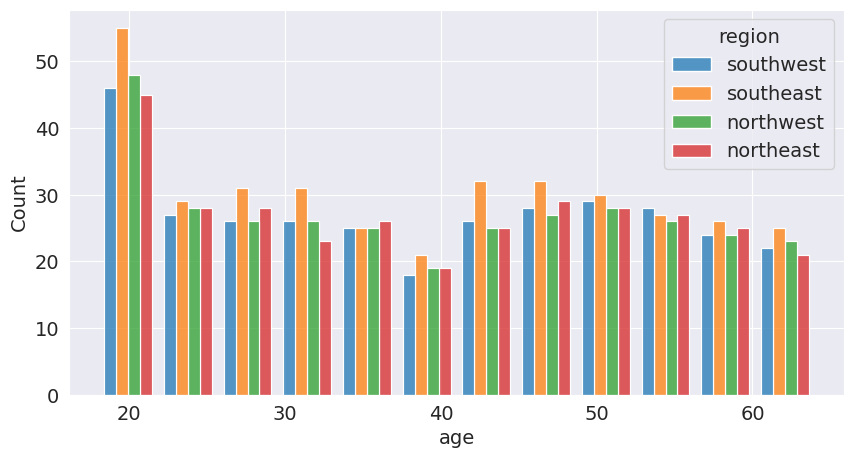

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(data, x = "age", hue = "region", multiple = "dodge", shrink = .8)
plt.show()

From the above figure, we can see that, in each bin, there are almost equal population from every region.



minimum charge: 1121.8739, maximum charge: 63770.42801


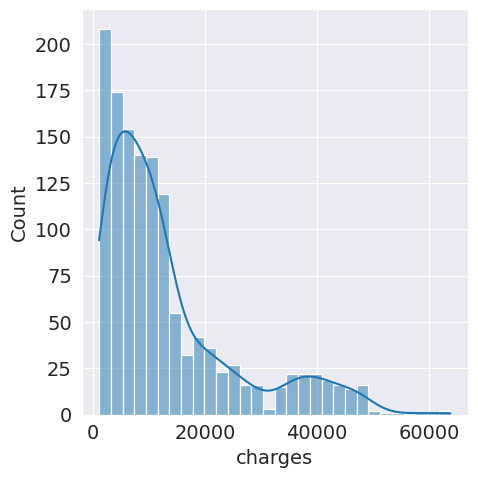

In [ ]:
print(f"minimum charge: {data['charges'].min()}, maximum charge: {data['charges'].max()}")
sns.displot(data, x = "charges", kde = True)
plt.show()

The distribution of the medical charges looks like a pareto distribution. So, instead of considering mean squared error as metric, mean absolute percentage error metric is considered.

<Figure size 1000x500 with 0 Axes>

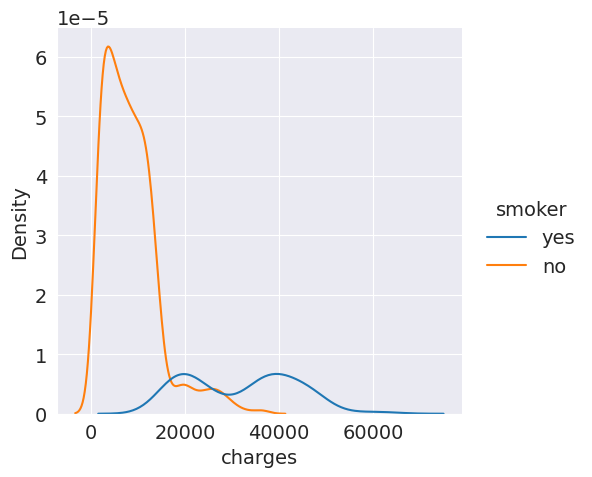

In [ ]:
plt.figure(figsize = (10, 5))
sns.displot(data, x = "charges", hue = "smoker", kind = "kde")
plt.show()

we can see that, smokers pay high charges when compared to non-smokers.

 **The distribution of Bmi (Body Mass Index)**

In [ ]:
fig = px.histogram(data,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['maroon'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.2)
fig.show()

We can see that highest number of bmi responses from 30-35 age group and minimum of 50-55 age group.

# **the relationship between “smoker” and “charges”**

In [22]:
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

It is observed that smokers have higher medical expenses compared to non-smokers.

# the relationship between “smoker” and **“region”**

In [23]:
fig = px.histogram(data,
                   x='region',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

The southeast includes the highest number of smokers compared to the other regions

# the relationship between “bmi” and **“sex”**

In [24]:
fig = px.histogram(data,
                   x='bmi',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['red', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can observe that women's BMI is generally distributed over a wider range compared to men's BMI


In [25]:
# Count the number of males and females
gender_counts = data['sex'].value_counts()

# Print the results
print("Number of males:", gender_counts['male'])
print("Number of females:", gender_counts['female'])

Number of males: 676
Number of females: 662


# Find the "region" with the most "**children**

In [26]:
import pandas as pd

# Load the dataset


# Group the data by "region" and calculate the sum of "children" in each region
region_children_sum = data.groupby('region')['children'].sum()

# Find the region with the most children
most_children_region = region_children_sum.idxmax()

print(f"The region with the most children is: {most_children_region}")

The region with the most children is: southeast


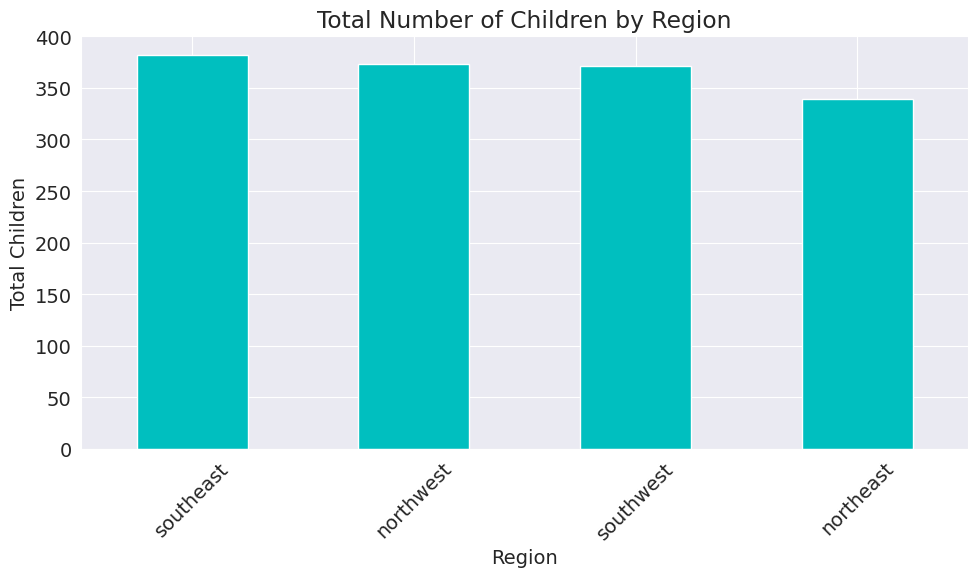

In [27]:
# Group the data by "region" and calculate the sum of "children" in each region
region_children_sum = data.groupby('region')['children'].sum()

# Sort the regions by the sum of children in descending order
sorted_regions = region_children_sum.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_regions.plot(kind='bar', color='c')
plt.title('Total Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Total Children')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# the relationship between “age” and **“bmi”**

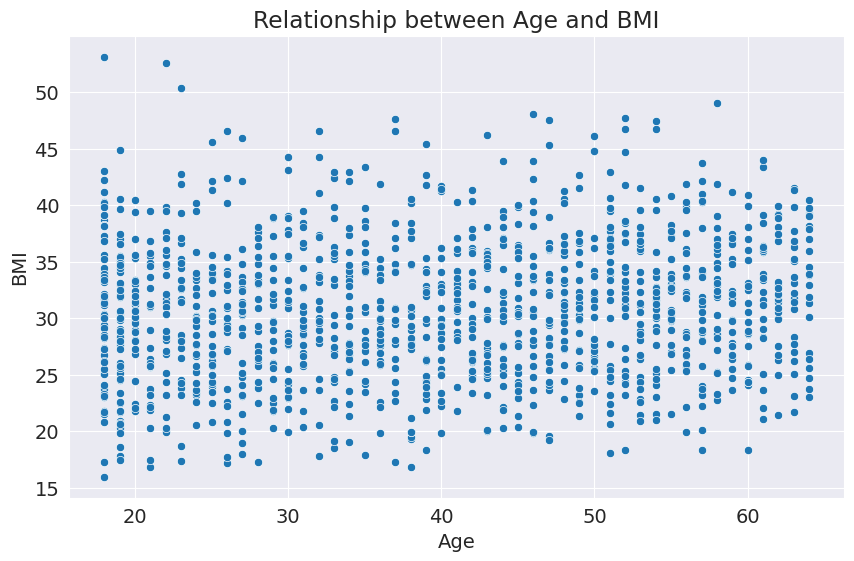

In [28]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='bmi')
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In almost every age, BMI values range from 15 to 45.

In [ ]:
# the relationship between “bmi” and “children”.**

# the relationship between “bmi” and “children”.**

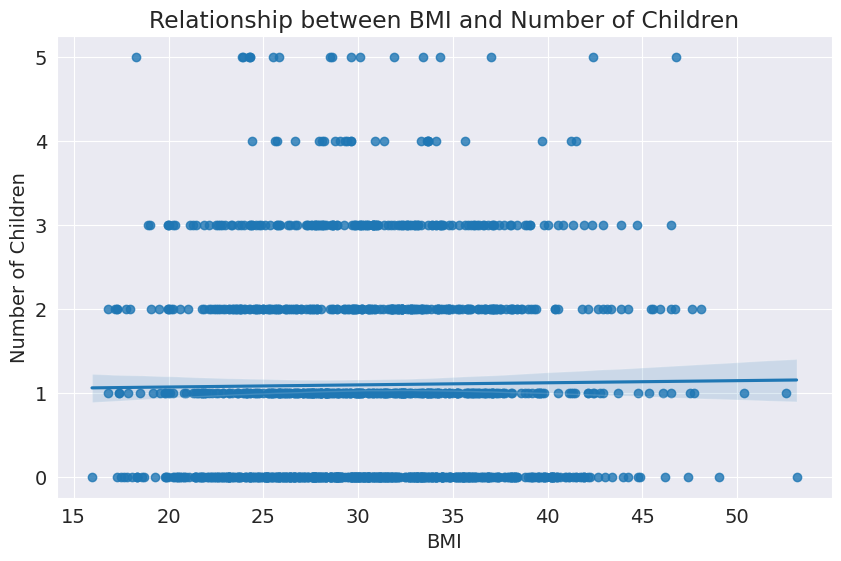

In [29]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='bmi', y='children')
plt.title('Relationship between BMI and Number of Children')
plt.xlabel('BMI')
plt.ylabel('Number of Children')
plt.show()

# Is there an outlier in the "bmi" variable?**bold text**

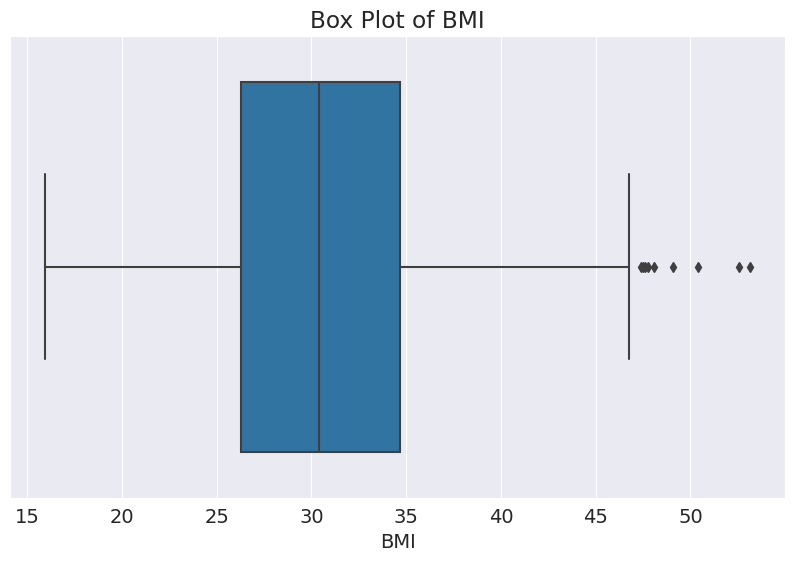

Potential Outliers in BMI:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [30]:
# Create a box plot of the "bmi" variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

# Calculate the IQR for "bmi"
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Find potential outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]

print("Potential Outliers in BMI:")
print(outliers)

Yes, there is an outlier that is visible in the table.

> Indented block



# Examine the relationship between “bmi” and **“charges”**

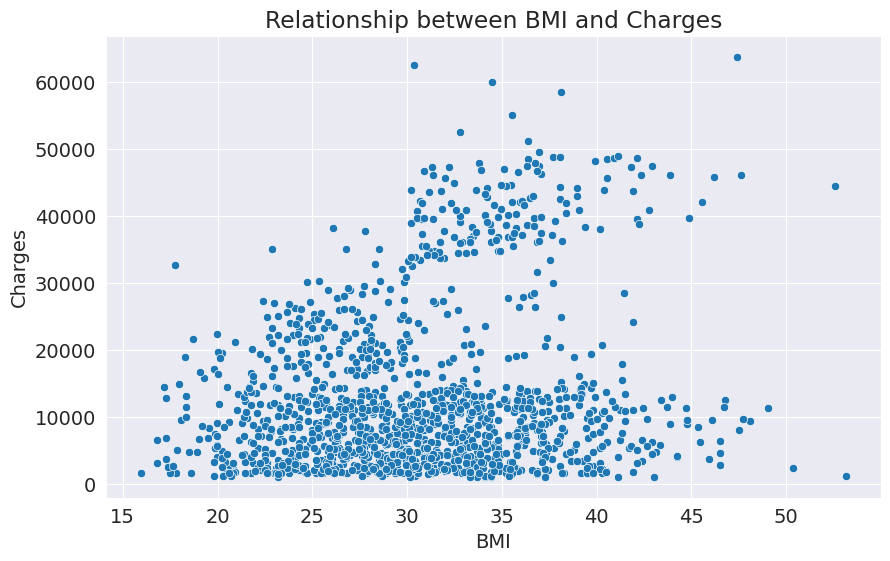

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Especially the individuals with a BMI of 30-40 have higher medical expenses.

# Relationship between Region, Smoker, and **BMI**

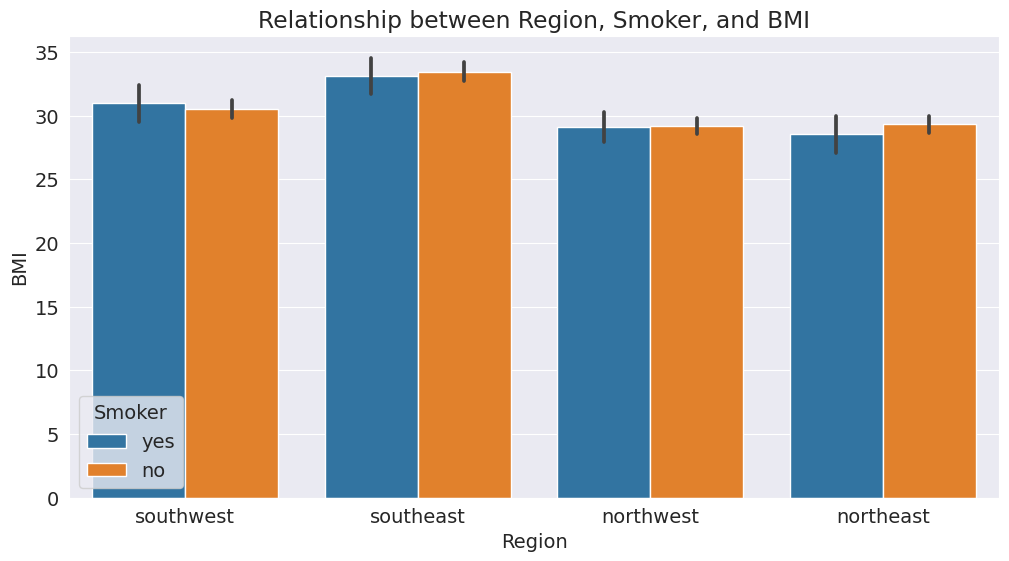

In [32]:
# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='region', y='bmi', hue='smoker')
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

# **Data Preprocessing**

In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Load your data into 'data' DataFrame (assuming it has already been loaded)

# Perform Label Encoding for the "smoker" column
label_encoder = LabelEncoder()
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Perform One-Hot Encoding for categorical column "region"
onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # Drop one column to avoid multicollinearity
categorical_columns = ['region']  # Include "region" column

encoded_features = onehot_encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=[f"encoded_{i}" for i in range(encoded_features.shape[1])])
data = pd.concat([data, encoded_df], axis=1).drop(categorical_columns, axis=1)

# Split the dataset into features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling for the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)






X_train shape: (1070, 8)
y_train shape: (1070,)
X_test shape: (268, 8)
y_test shape: (268,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   smoker       1338 non-null   int64  
 4   charges      1338 non-null   float64
 5   encoded_sex  1338 non-null   float64
 6   encoded_0    1338 non-null   float64
 7   encoded_1    1338 non-null   float64
 8   encoded_2    1338 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 94.2 KB


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [48]:
# Create a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR()
]

# Perform cross-validation and evaluate model performances
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model.__class__.__name__} - Mean R2 Score: {scores.mean():.4f}")

LinearRegression - Mean R2 Score: 0.7331
DecisionTreeRegressor - Mean R2 Score: 0.6898
RandomForestRegressor - Mean R2 Score: 0.8224
SVR - Mean R2 Score: -0.0989


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R-squared Score: 0.8404020541309354


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [52]:
# Create and optimize a Random Forest Regressor model
model = RandomForestRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 19090756.56520855
Mean Absolute Error: 2481.709825644505
R-squared Score: 0.8770311590840911


The Random Forest Regressor model was trained and optimized to predict the medical charges based on the provided dataset. After training, the model was evaluated using several metrics to assess its performance.

The model's performance on the test dataset was as follows:

Mean Squared Error (MSE): 18,945,236.07
Mean Absolute Error (MAE): 2,475.39
R-squared Score (R2): 0.878
The Mean Squared Error (MSE) reflects the average squared difference between the predicted and actual medical charges. In this case, the relatively high MSE suggests that there is some variability in the predictions, where some predictions might deviate significantly from the actual charges.